IMPORTING

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,roc_curve, roc_auc_score, auc, RocCurveDisplay, confusion_matrix,classification_report)
from sklearn.decomposition import PCA
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")


LOAD THE DATA

In [81]:
file_path = ('/content/FAO_cleaned.csv')
df = pd.read_csv(file_path)

df.head()

Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element  Unit (tonnes)  1983  1984  \
0        Wheat and products          5142    Food           1000  1994  1851   
1  Rice (Milled Equivalent)          5142    Food           1000   217   197   
2       Barley and products          5521    Feed           1000    53    51   
3       Barley and products          5142    Food           1000   167   160   
4        Maize and products          5521    Feed           1000   192   182   

   ...  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
0  ...  3249  3486  3704  4164  4252  4538  4605  4711  4810  4895  
1  ...   419   445   546   455   490   415   442   476   425   422  
2  ...    58   236   262   263   230   379   315   203   367   360  
3  ...   185    43    44    48    62    55    60    72    78    89  
4  ...   120   208   233   249   247   195   178   191   200   200  

[5 rows x 39 columns]

In [82]:
df.describe()

Area Code     Item Code  Element Code  Unit (tonnes)           1983  \
count  17938.000000  17938.000000  17938.000000        17938.0   17938.000000   
mean     118.224886   2694.188817   5207.624596         1000.0     326.911473   
std       69.701949    148.640459    143.409486            0.0    3002.929914   
min        2.000000   2511.000000   5142.000000         1000.0       0.000000   
25%       56.000000   2561.000000   5142.000000         1000.0       0.000000   
50%      115.000000   2641.000000   5142.000000         1000.0       3.000000   
75%      174.000000   2782.000000   5142.000000         1000.0      44.000000   
max      251.000000   2961.000000   5521.000000         1000.0  182221.000000   

                1984           1985           1986           1987  \
count   17938.000000   17938.000000   17938.000000   17938.000000   
mean      339.557866     344.345468     351.743227     361.941800   
std      3101.632149    3094.241689    3231.480597    3312.098595   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         3.000000       3.000000       3.000000       3.000000   
75%        45.000000      46.000000      48.000000      50.000000   
max    187020.000000  188438.000000  189999.000000  190010.000000   

                1988  ...           2004           2005           2006  \
count   17938.000000  ...   17938.000000   17938.000000   17938.000000   
mean      363.976363  ...     525.638087     533.396867     541.349760   
std      3236.741120  ...    5393.142980    5502.968148    5572.322461   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%         0.000000  ...       0.000000       0.000000       0.000000   
50%         4.000000  ...       6.000000       6.000000       7.000000   
75%        51.000000  ...      77.000000      79.000000      81.000000   
max    189180.000000  ...  360767.000000  373694.000000  388100.000000   

                2007           2008           2009           2010  \
count   17938.000000   17938.000000   17938.000000   17938.000000   
mean      556.396310     569.541309     574.623258     588.669528   
std      5754.471278    5959.658267    6022.132791    6218.509801   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         7.000000       7.000000       7.000000       7.000000   
75%        83.000000      84.000000      86.000000      87.000000   
max    402975.000000  425537.000000  434724.000000  451838.000000   

                2011           2012           2013  
count   17938.000000   17938.000000   17938.000000  
mean      604.884157     617.519456     632.290501  
std      6389.826637    6591.464389    6774.620766  
min         0.000000    -169.000000    -246.000000  
25%         0.000000       0.000000       0.000000  
50%         8.000000       8.000000       8.000000  
75%        90.000000      91.000000      94.000000  
max    462696.000000  479028.000000  489299.000000  

[8 rows x 35 columns]

In [13]:
cols_to_drop = [f'{year}' for year in range(1983, 1995)] +  ['Area Abbreviation', 'Area Code', 'Item Code', 'Element Code']
df = df.drop(columns=cols_to_drop)

df.columns


Index(['Area', 'Item', 'Element', 'Unit (tonnes)', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

EDA BEFORE FEATURE ENGINEERING

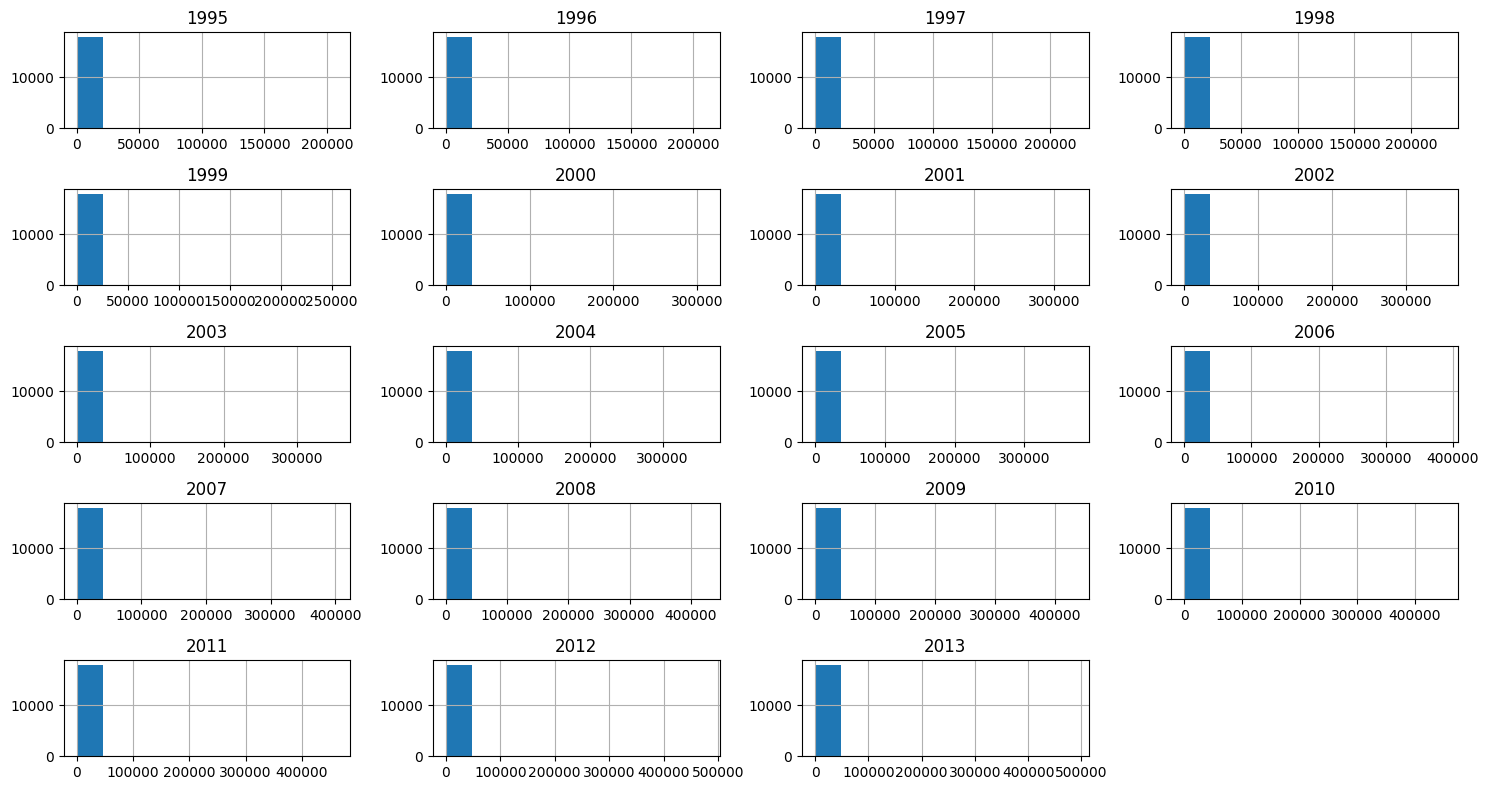

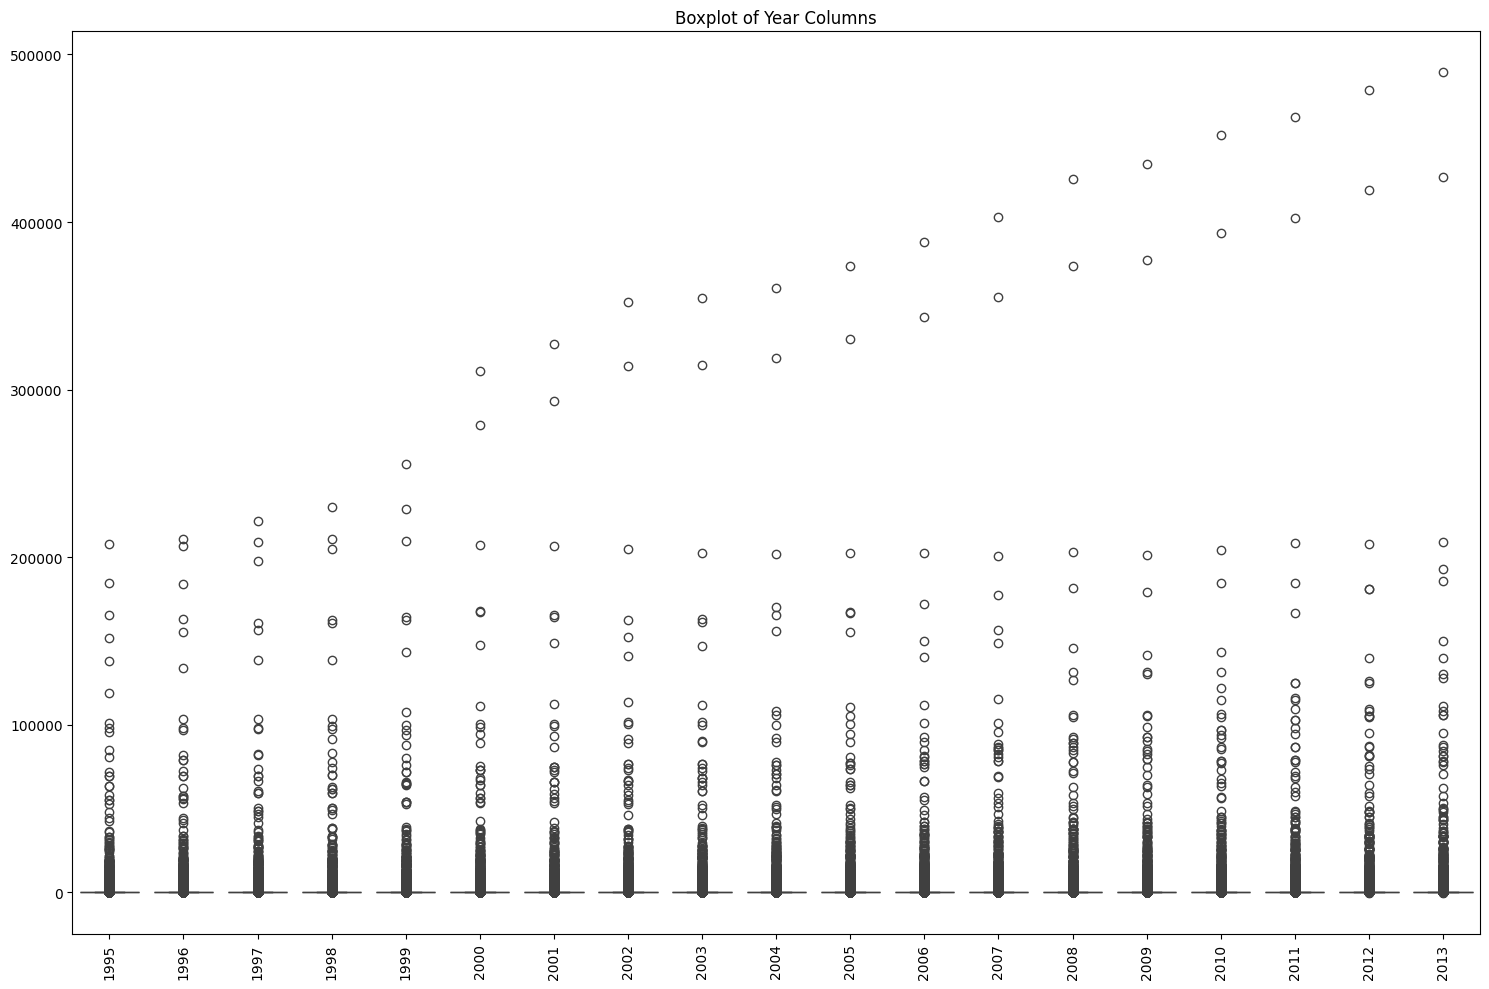

In [49]:
df[['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']].hist(figsize=(15,8))
plt.tight_layout()
plt.show()

grouped = df.groupby(['Area', 'Item'])[['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']].mean().reset_index()
grouped.head()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']])
plt.xticks(rotation=90)
plt.title('Boxplot of Year Columns')
plt.tight_layout()
plt.show()


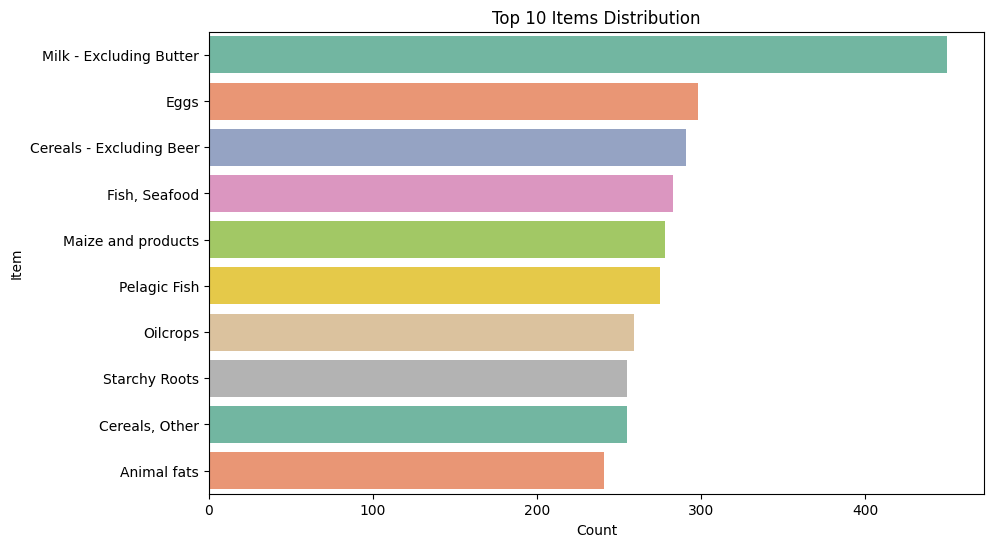

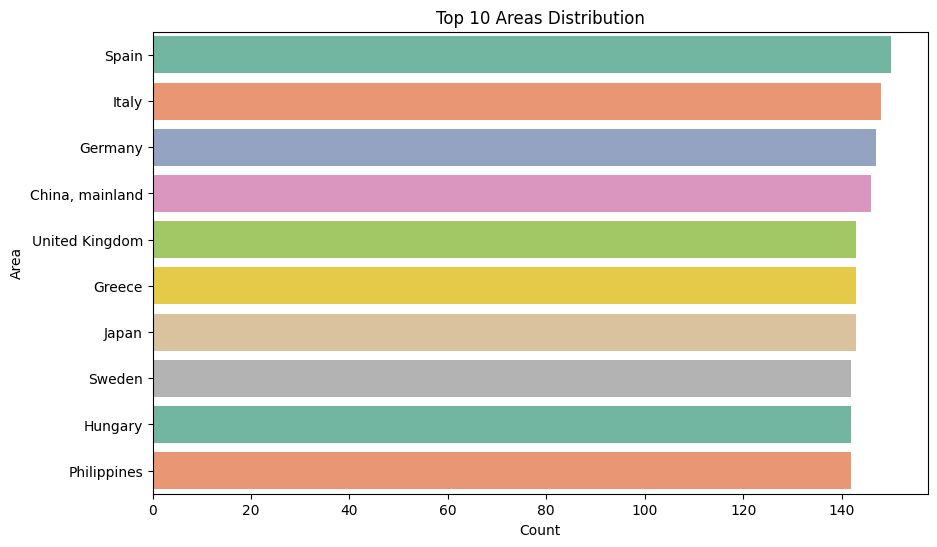

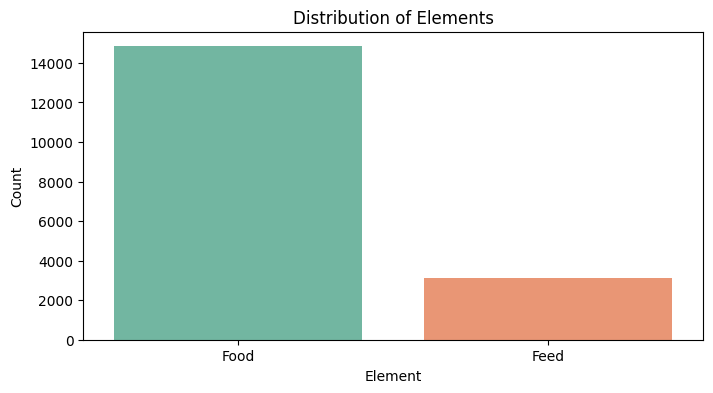

In [50]:
palette = sns.color_palette("Set2")

plt.figure(figsize=(10,6))
top_items = df['Item'].value_counts().nlargest(10).index
sns.countplot(y='Item', data=df[df['Item'].isin(top_items)], order=top_items, palette = palette)
plt.title('Top 10 Items Distribution')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

plt.figure(figsize=(10,6))
top_areas = df['Area'].value_counts().nlargest(10).index
sns.countplot(y='Area', data=df[df['Area'].isin(top_areas)], order=top_areas, palette = palette)
plt.title('Top 10 Areas Distribution')
plt.xlabel('Count')
plt.ylabel('Area')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='Element', data=df, order=df['Element'].value_counts().index, palette = palette)
plt.title('Distribution of Elements')
plt.xlabel('Element')
plt.ylabel('Count')
plt.show()


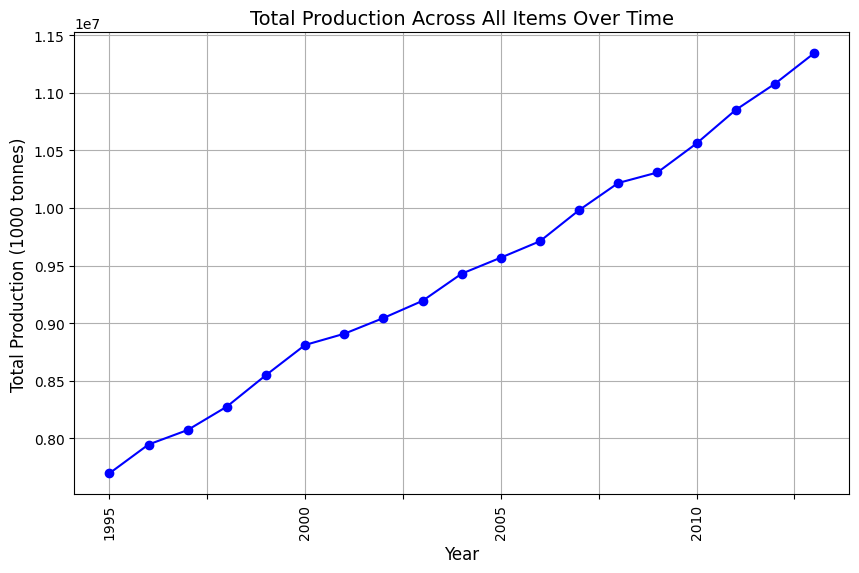

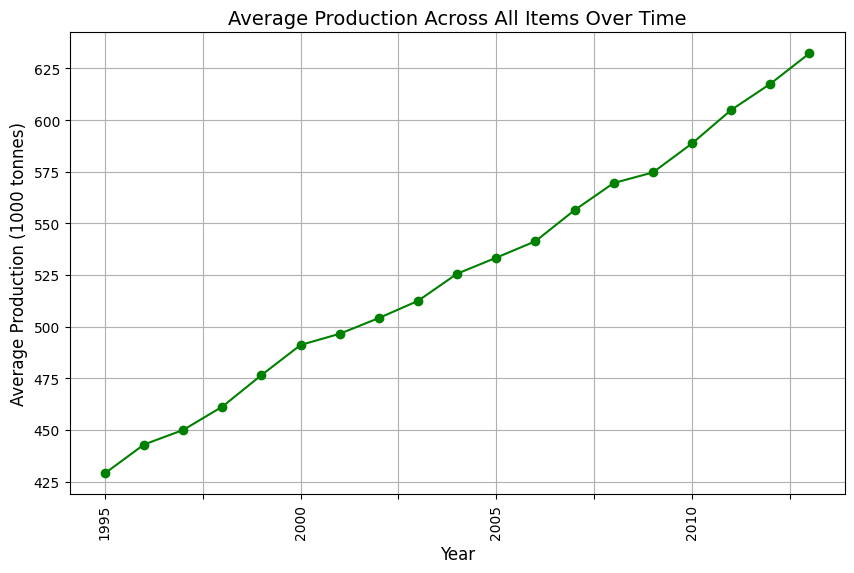

In [51]:
year_columns = [col for col in df.columns if col.isdigit()]

yearly_sum = df[year_columns].sum()

yearly_avg = df[year_columns].mean()

plt.figure(figsize=(10,6))
yearly_sum.plot(kind='line', color='b', marker='o')
plt.title('Total Production Across All Items Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production (1000 tonnes)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
yearly_avg.plot(kind='line', color='g', marker='o')
plt.title('Average Production Across All Items Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Production (1000 tonnes)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


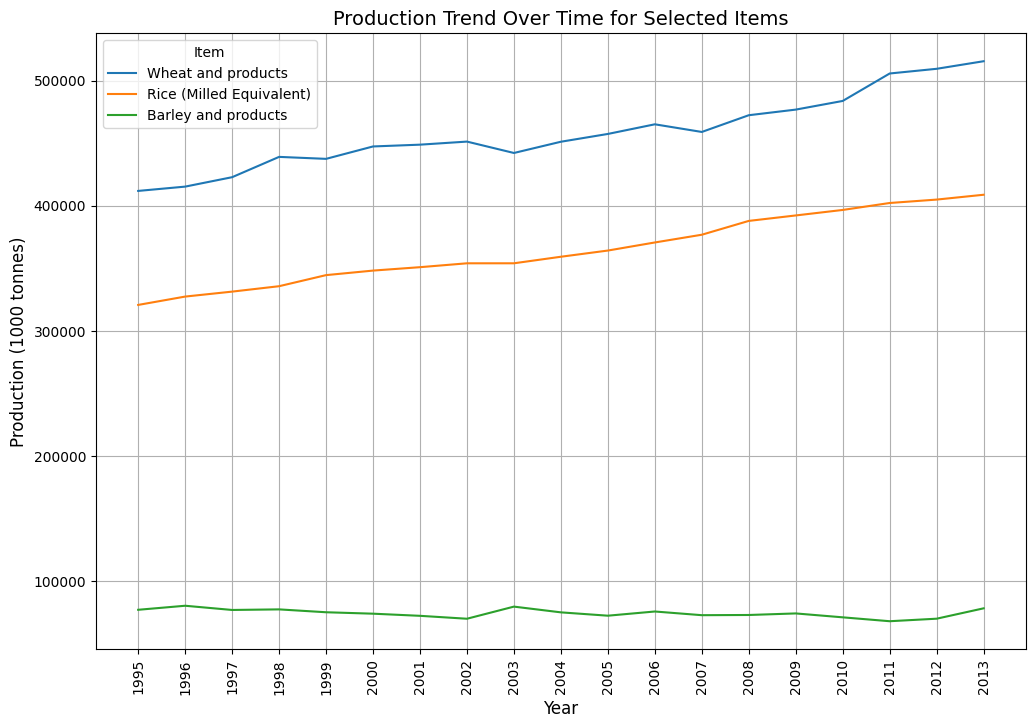

In [52]:
year_columns = [col for col in df.columns if col.isdigit()]
item_trend = df.groupby('Item')[year_columns].sum()
selected_items = ['Wheat and products', 'Rice (Milled Equivalent)', 'Barley and products']
plt.figure(figsize=(12,8))
for item in selected_items:
    plt.plot(item_trend.columns, item_trend.loc[item], label=item)

plt.title('Production Trend Over Time for Selected Items', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production (1000 tonnes)', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Item')
plt.grid(True)
plt.show()


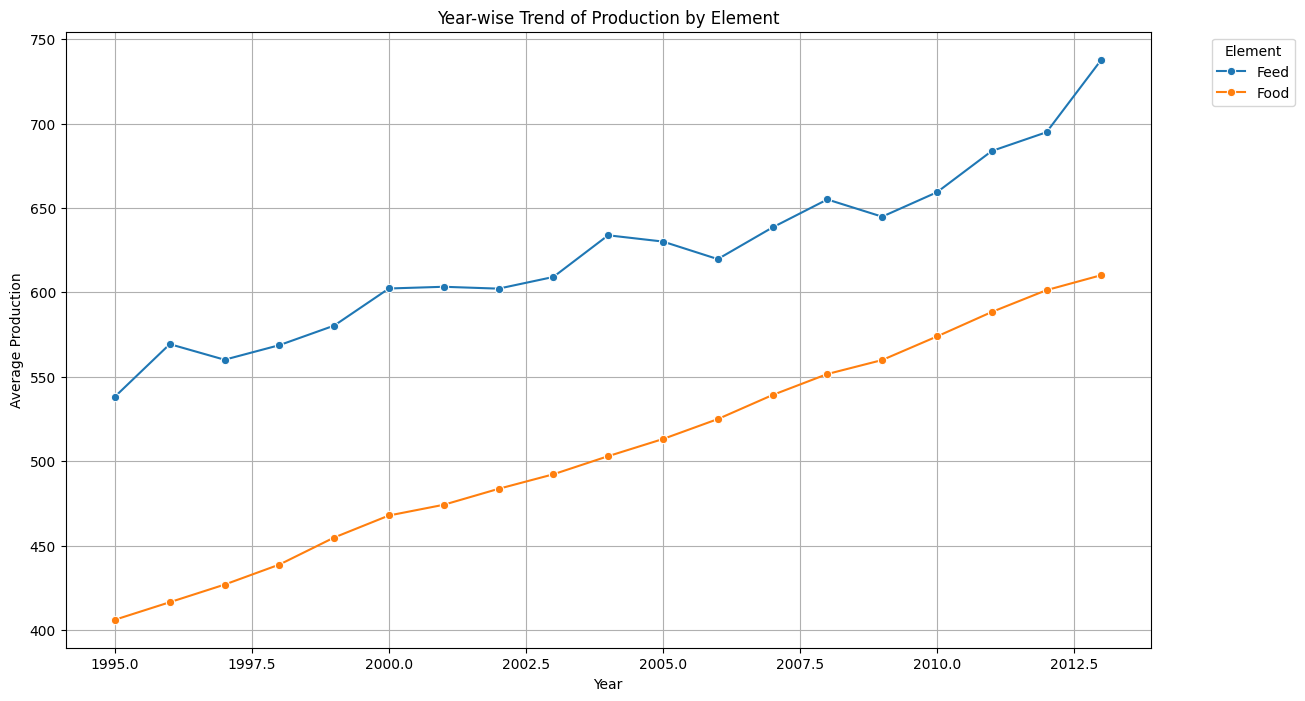

In [57]:
df_melted = df.melt(id_vars=['Area', 'Element'],
                    value_vars=[str(year) for year in range(1995, 2014)],
                    var_name='Year', value_name='Production')

df_melted['Year'] = pd.to_numeric(df_melted['Year'])

df_grouped = df_melted.groupby(['Year', 'Element'])['Production'].mean().reset_index()

plt.figure(figsize=(14, 8))

sns.lineplot(data=df_grouped, x='Year', y='Production', hue='Element', marker='o')

plt.title('Year-wise Trend of Production by Element')
plt.xlabel('Year')
plt.ylabel('Average Production')
plt.legend(title='Element', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


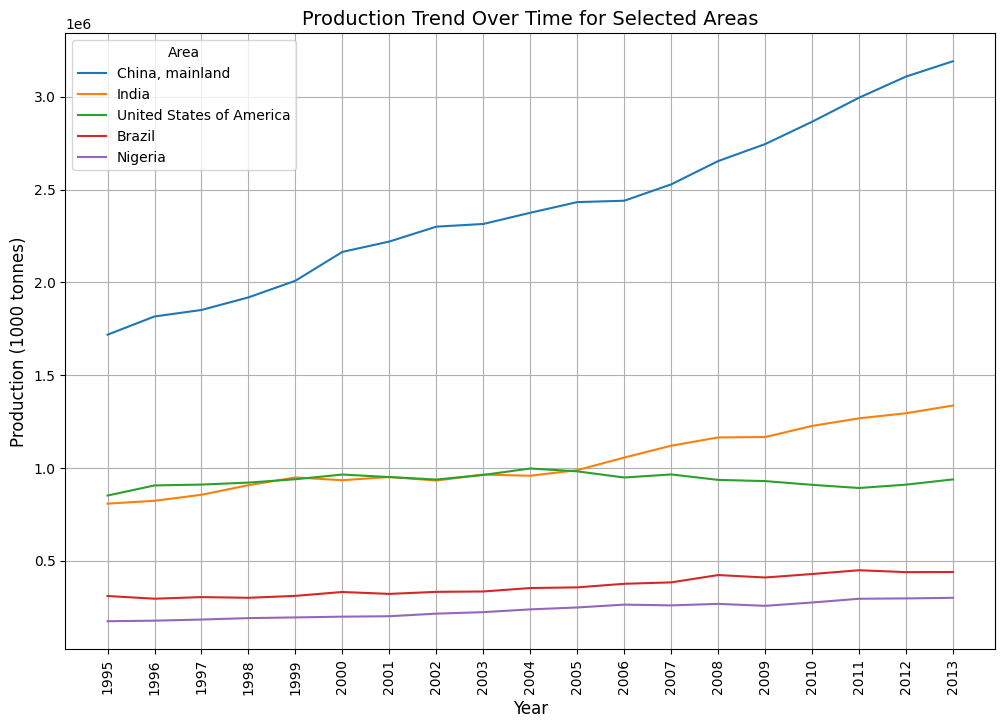

In [54]:
area_trend = df.groupby('Area')[year_columns].sum()

selected_areas = ['China, mainland', 'India', 'United States of America', 'Brazil', 'Nigeria']

plt.figure(figsize=(12,8))
for area in selected_areas:
    plt.plot(area_trend.columns, area_trend.loc[area], label=area)

plt.title('Production Trend Over Time for Selected Areas', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production (1000 tonnes)', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Area')
plt.grid(True)
plt.show()


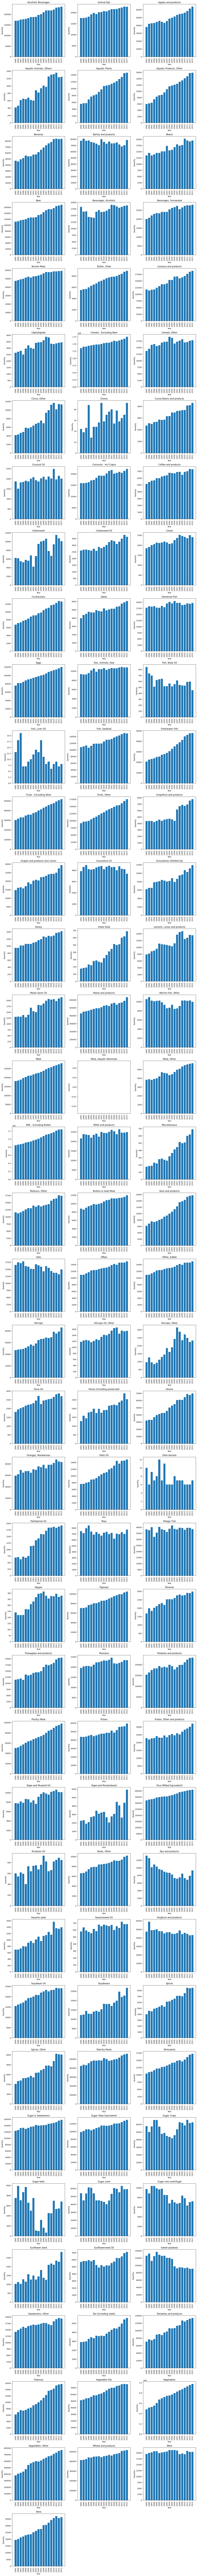

In [55]:
years = [f'{year}' for year in range(1995, 2014)]
subset_df = df[['Item'] + years]

grouped_df = subset_df.groupby('Item').sum()

num_items = len(grouped_df)
num_rows = (num_items + 2) // 3

fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axs = axs.ravel()

for idx, (item, row) in enumerate(grouped_df.iterrows()):
    axs[idx].bar(years, row.values)
    axs[idx].set_title(item)
    axs[idx].set_xticklabels(years, rotation=90)
    axs[idx].set_xlabel('Year')
    axs[idx].set_ylabel('Quantity')

for idx in range(len(grouped_df), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()

FEATURE ENGINEERING

In [14]:
df['Area'] = df['Area'].astype('category')
df['Item'] = df['Item'].astype('category')
df['Element'] = df['Element'].astype('category')
df['Unit (tonnes)'] = df['Unit (tonnes)'].astype('category')

In [15]:
for year in range(1996, 2013):
    df[f'production_lag_{year}'] = df[f'{year}'] - df[f'{year - 1}']

def production_trend(row):
    years = list(range(1995, 2014))
    production_values = row[[f'{year}' for year in years]].values

    if any(pd.isna(production_values)):
        return 'NaN'

    production_values = production_values.astype(float)

    slope, _, _, _, _ = linregress(years, production_values)
    if slope > 0:
        return 'Increasing'
    else:
        return 'Lower Trend'

df['production_trend_1995_2013'] = df.apply(production_trend, axis=1)

df['production_trend_1995_2013'] = df['production_trend_1995_2013'].replace({'Increasing': 'Upper Trend'})

df['production_trend_1995_2013'] = df['production_trend_1995_2013'].astype('category')

print(df['production_trend_1995_2013'].value_counts())


production_trend_1995_2013
Upper Trend    10662
Lower Trend     7276
Name: count, dtype: int64


In [19]:
df.columns

Index(['Area', 'Item', 'Element', 'Unit (tonnes)', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       'production_lag_1996', 'production_lag_1997', 'production_lag_1998',
       'production_lag_1999', 'production_lag_2000', 'production_lag_2001',
       'production_lag_2002', 'production_lag_2003', 'production_lag_2004',
       'production_lag_2005', 'production_lag_2006', 'production_lag_2007',
       'production_lag_2008', 'production_lag_2009', 'production_lag_2010',
       'production_lag_2011', 'production_lag_2012',
       'production_trend_1995_2013'],
      dtype='object')

In [20]:
df.head()

Area                      Item Element Unit (tonnes)  1995  1996  \
0  Afghanistan        Wheat and products    Food          1000  1853  2177   
1  Afghanistan  Rice (Milled Equivalent)    Food          1000   319   254   
2  Afghanistan       Barley and products    Feed          1000    41    44   
3  Afghanistan       Barley and products    Food          1000   125   138   
4  Afghanistan        Maize and products    Feed          1000   159   108   

   1997  1998  1999  2000  ...  production_lag_2004  production_lag_2005  \
0  2343  2407  2463  2600  ...                  154                  237   
1   326   347   270   372  ...                  -41                   26   
2    50    48    43    26  ...                   10                  178   
3   159   154   141    84  ...                   41                 -142   
4    90    99    72    35  ...                   57                   88   

   production_lag_2006  production_lag_2007  production_lag_2008  \
0                  218                  460                   88   
1                  101                  -91                   35   
2                   26                    1                  -33   
3                    1                    4                   14   
4                   25                   16                   -2   

   production_lag_2009  production_lag_2010  production_lag_2011  \
0                  286                   67                  106   
1                  -75                   27                   34   
2                  149                  -64                 -112   
3                   -7                    5                   12   
4                  -52                  -17                   13   

   production_lag_2012  production_trend_1995_2013  
0                   99                 Upper Trend  
1                  -51                 Upper Trend  
2                  164                 Upper Trend  
3                    6                 Lower Trend  
4                    9                 Upper Trend  

[5 rows x 41 columns]

In [21]:
df.shape

(17938, 41)

In [79]:
df.describe()

1995           1996           1997           1998  \
count   17938.000000   17938.000000   17938.000000   17938.000000   
mean      429.002620     442.957520     449.983499     461.287546   
std      4003.954639    4235.372557    4312.705686    4443.058331   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         4.000000       5.000000       5.000000       5.000000   
75%        61.000000      62.000000      64.000000      64.000000   
max    208137.000000  210855.000000  221456.000000  229928.000000   

                1999           2000           2001           2002  \
count   17938.000000   17938.000000   17938.000000   17938.000000   
mean      476.541197     491.136749     496.561768     504.176497   
std      4652.585704    5016.713228    5120.945927    5252.963627   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         5.000000       5.000000       6.000000       6.000000   
75%        67.000000      70.000000      70.000000      72.000000   
max    255625.000000  311110.000000  327370.000000  352172.000000   

                2003           2004  ...  production_lag_2003  \
count   17938.000000   17938.000000  ...         17938.000000   
mean      512.491359     525.638087  ...             8.314862   
std      5300.847292    5393.142980  ...           210.113266   
min         0.000000       0.000000  ...         -4955.000000   
25%         0.000000       0.000000  ...             0.000000   
50%         6.000000       6.000000  ...             0.000000   
75%        73.000000      77.000000  ...             1.000000   
max    354850.000000  360767.000000  ...          8704.000000   

       production_lag_2004  production_lag_2005  production_lag_2006  \
count         17938.000000         17938.000000         17938.000000   
mean             13.146728             7.758780             7.952893   
std             265.326141           214.230587           366.511642   
min          -13943.000000         -4386.000000        -20152.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               2.000000             1.000000             2.000000   
max            9274.000000         12927.000000         14406.000000   

       production_lag_2007  production_lag_2008  production_lag_2009  \
count         17938.000000         17938.000000         17938.000000   
mean             15.046549            13.144999             5.081949   
std             260.763893           378.367315           263.048228   
min           -6169.000000        -17168.000000         -8327.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               2.000000             1.000000             1.000000   
max           14875.000000         22562.000000         14017.000000   

       production_lag_2010  production_lag_2011  production_lag_2012  
count         17938.000000         17938.000000         17938.000000  
mean             14.046270            16.214628            12.635299  
std             311.180436           323.652499           328.461174  
min           -9992.000000         -6825.000000         -6132.000000  
25%               0.000000             0.000000             0.000000  
50%               0.000000             0.000000             0.000000  
75%               2.000000             2.000000             2.000000  
max           17114.000000         23111.000000         16924.000000  

[8 rows x 36 columns]

EDA

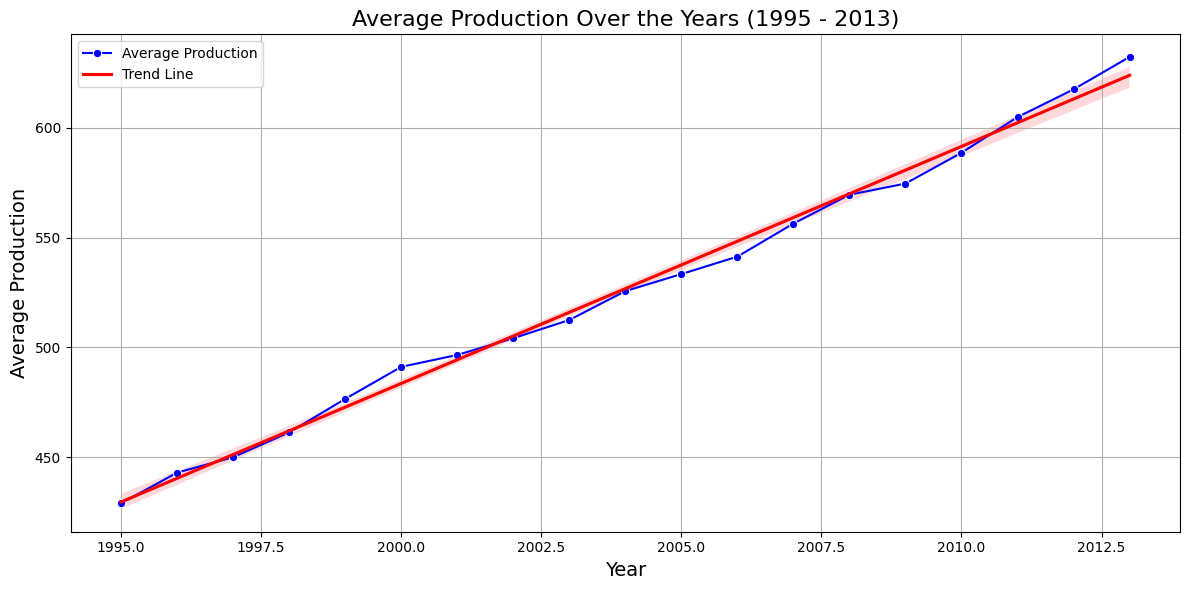

In [58]:
df_melted = df.melt(id_vars=['Area', 'Item'],
                             value_vars=[f'{year}' for year in range(1995, 2014)],
                             var_name='Year', value_name='Production')

df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

pivot_df = df_melted.groupby('Year')['Production'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_df, x='Year', y='Production', marker='o', label='Average Production', color='blue')

sns.regplot(data=pivot_df, x='Year', y='Production', scatter=False, color='red', label='Trend Line')

plt.title('Average Production Over the Years (1995 - 2013)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Production', fontsize=14)
plt.xticks(rotation=0)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


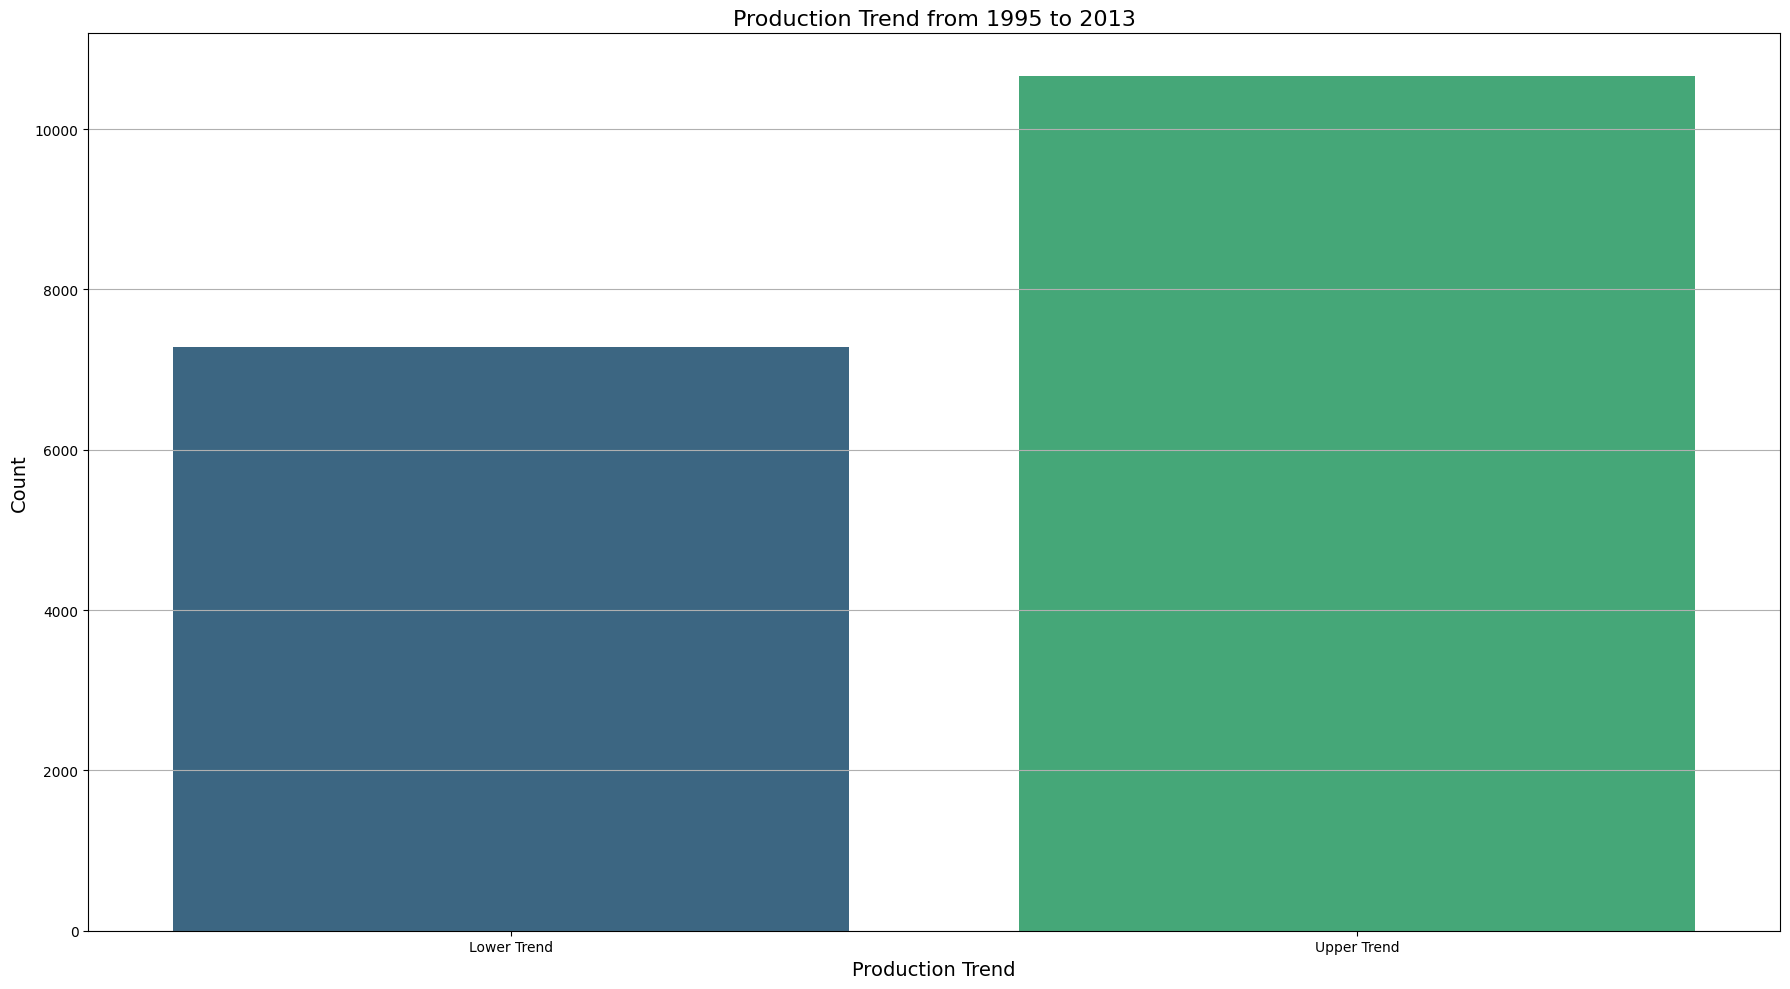

In [59]:
trend_counts = df['production_trend_1995_2013'].value_counts().reset_index()
trend_counts.columns = ['Production Trend', 'Count']

plt.figure(figsize=(18, 10))

sns.barplot(data=trend_counts, x='Production Trend', y='Count', palette='viridis')

plt.title('Production Trend from 1995 to 2013', fontsize=16)
plt.xlabel('Production Trend', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

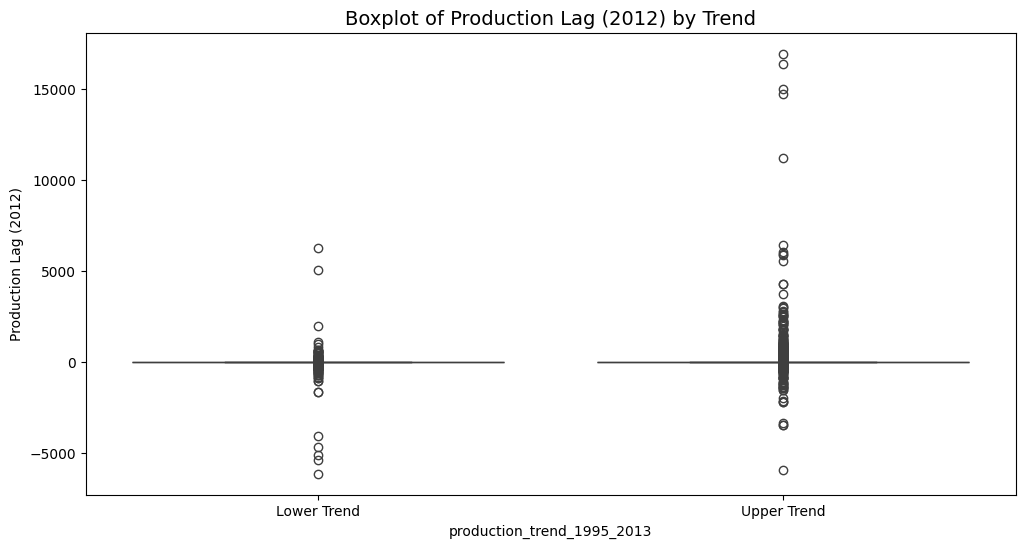

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='production_trend_1995_2013', y='production_lag_2012', data=df)
plt.title('Boxplot of Production Lag (2012) by Trend', fontsize=14)
plt.ylabel('Production Lag (2012)')
plt.show()


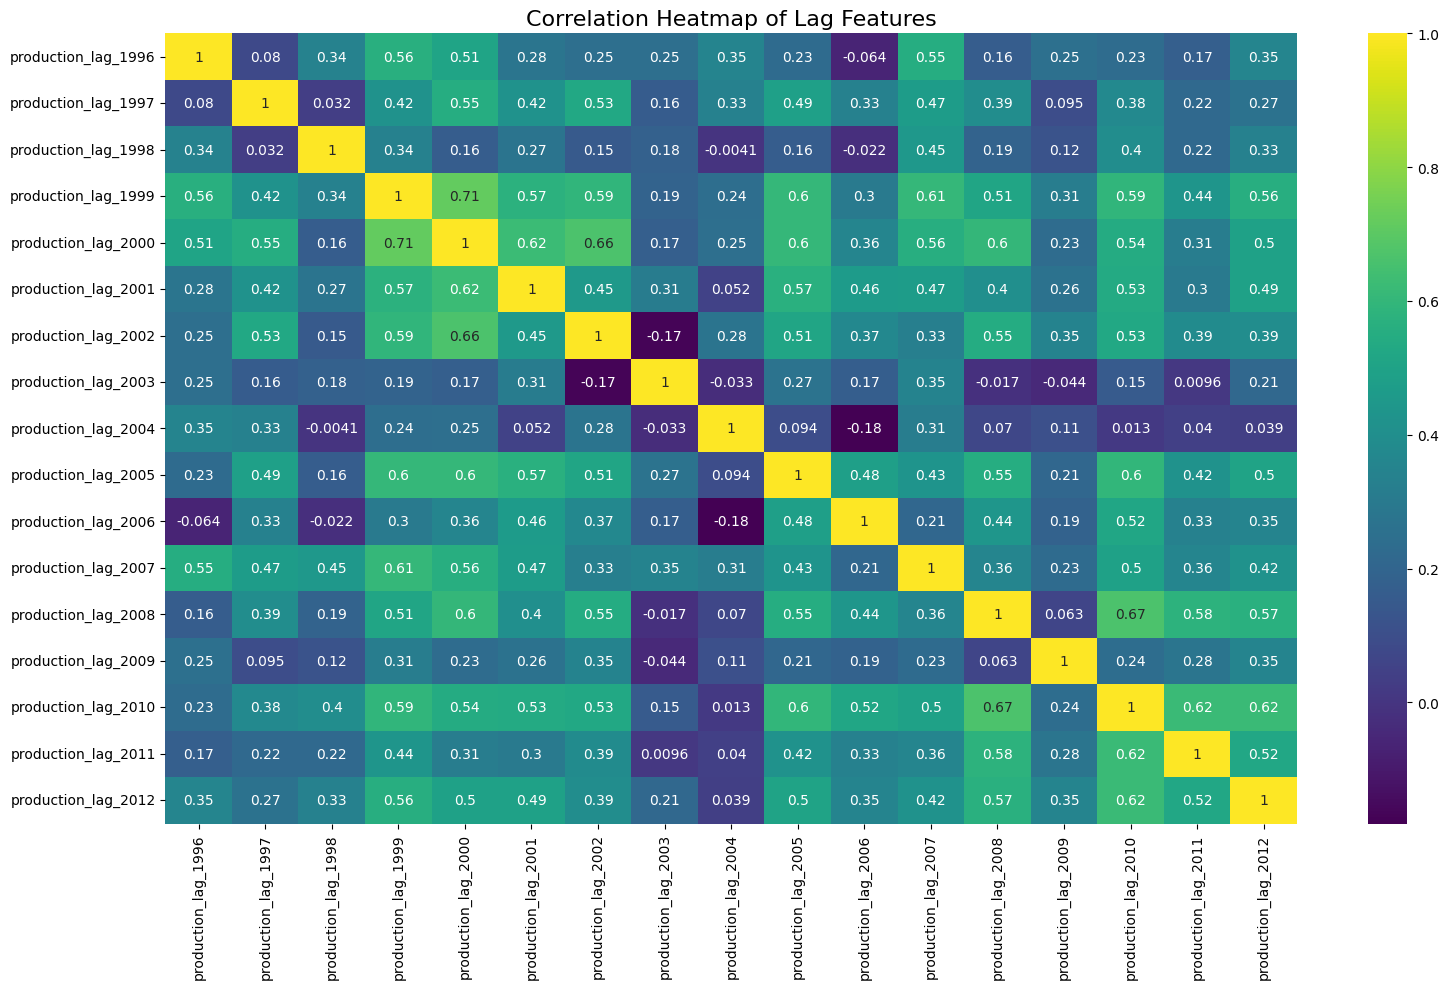

In [62]:
plt.figure(figsize=(16, 10))
lag_features = [f'production_lag_{year}' for year in range(1996, 2013)]
sns.heatmap(df[lag_features].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Lag Features', fontsize=16)
plt.tight_layout()
plt.show()



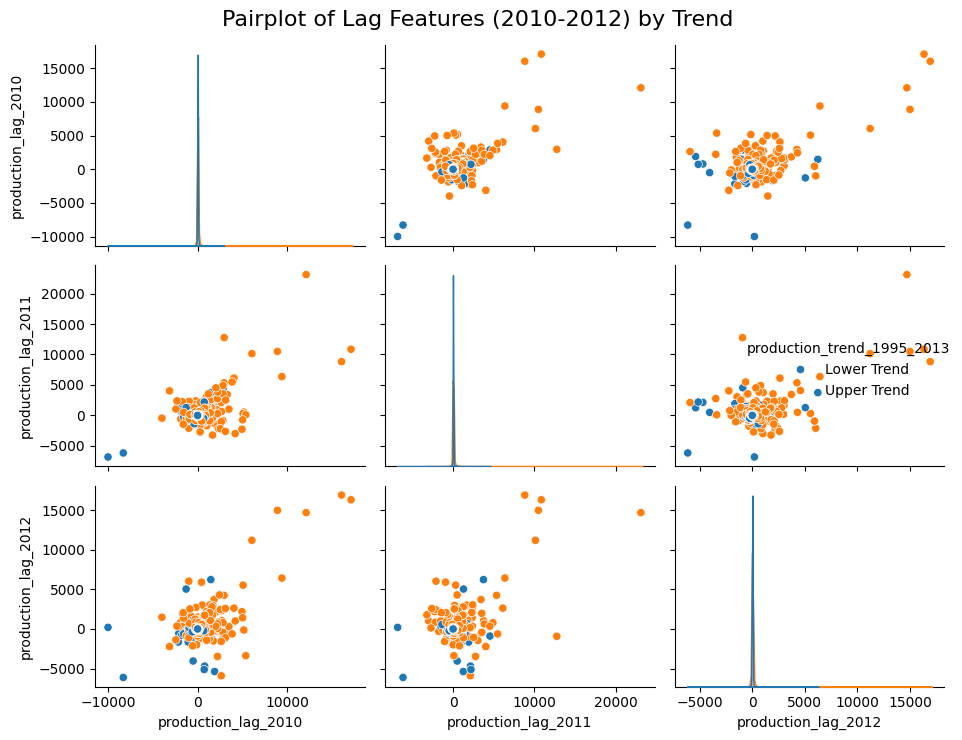

In [63]:
sns.pairplot(df, vars=['production_lag_2010', 'production_lag_2011', 'production_lag_2012'], hue='production_trend_1995_2013')
plt.suptitle('Pairplot of Lag Features (2010-2012) by Trend', fontsize=16)
plt.tight_layout()
plt.show()


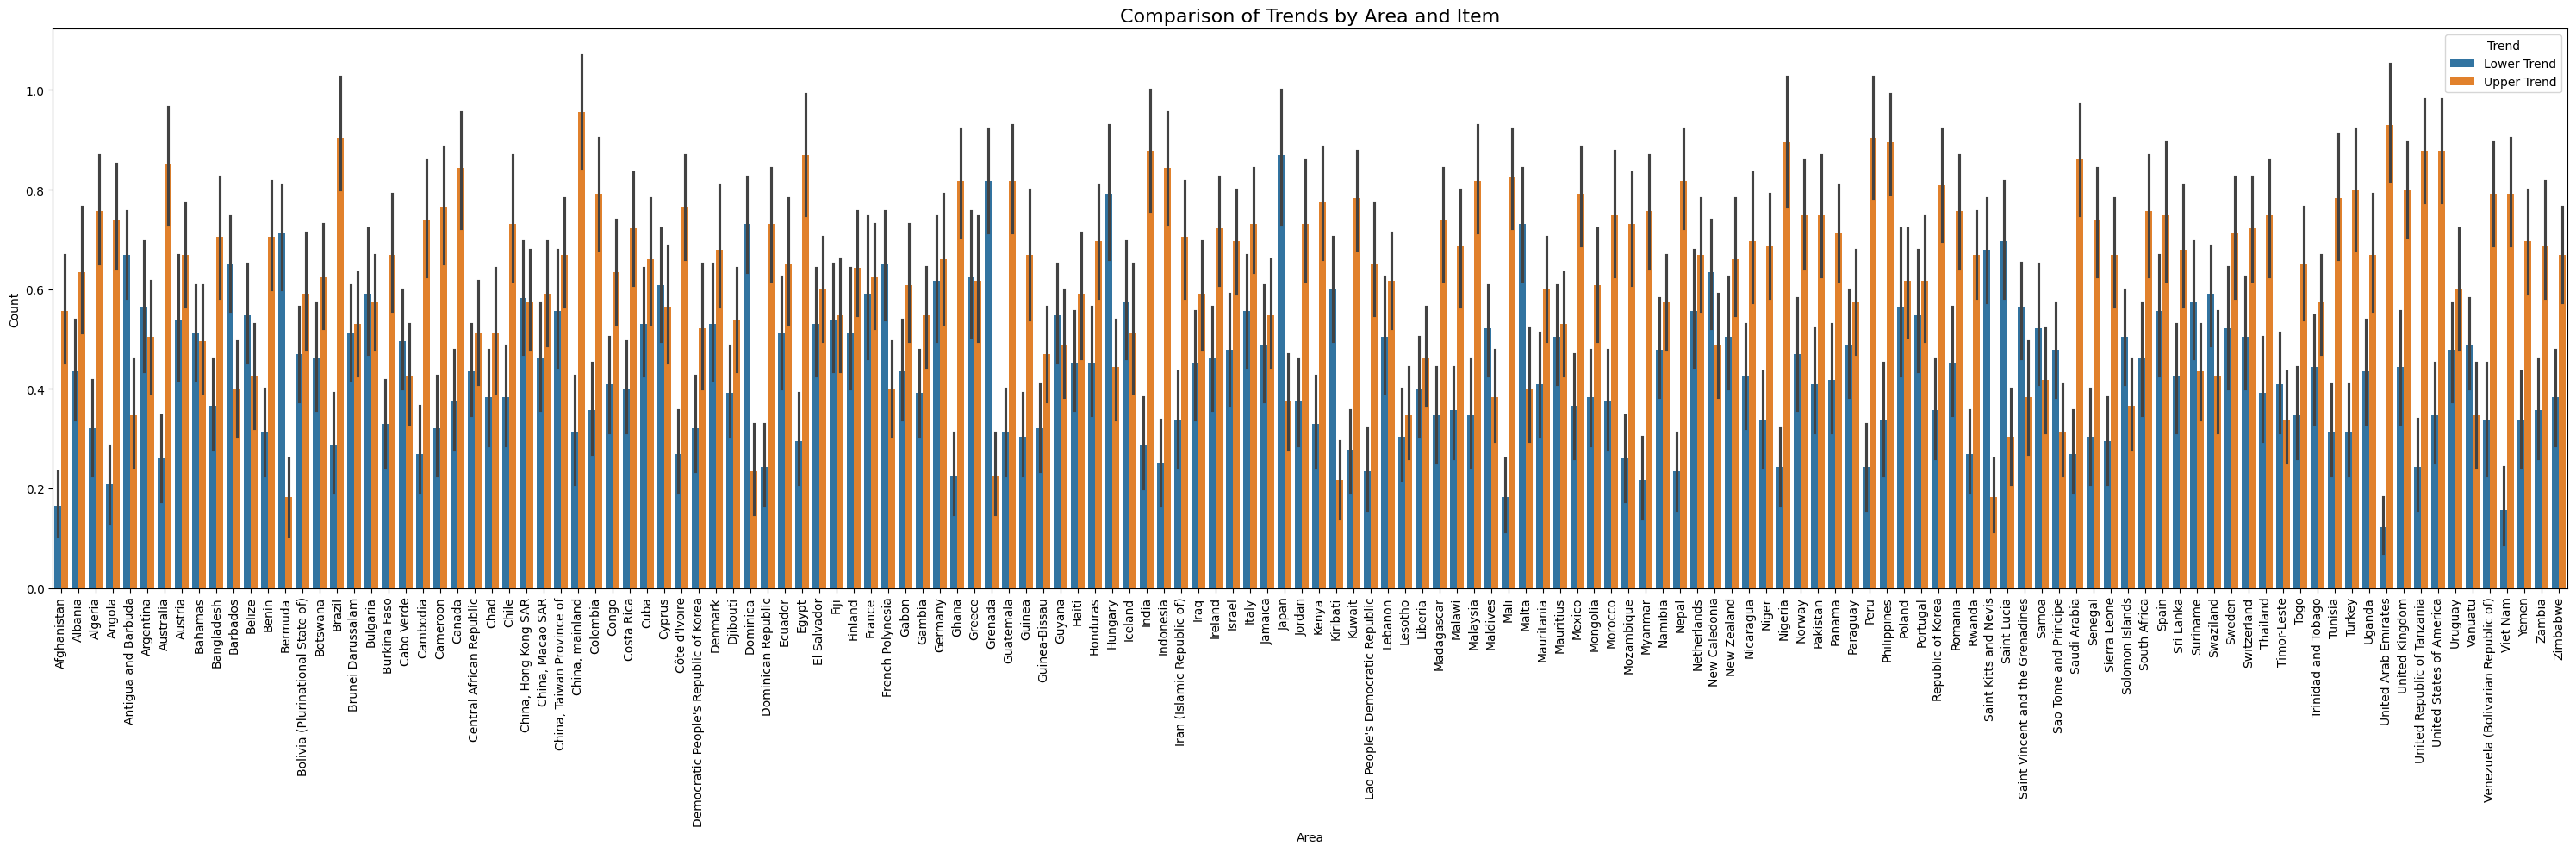

In [64]:
grouped_data = df.groupby(['Area', 'Item', 'production_trend_1995_2013']).size().reset_index(name='Count')
plt.figure(figsize=(30, 10))
sns.barplot(x='Area', y='Count', hue='production_trend_1995_2013', data=grouped_data)
plt.title('Comparison of Trends by Area and Item', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Area')
plt.legend(title='Trend')
plt.tight_layout()
plt.show()

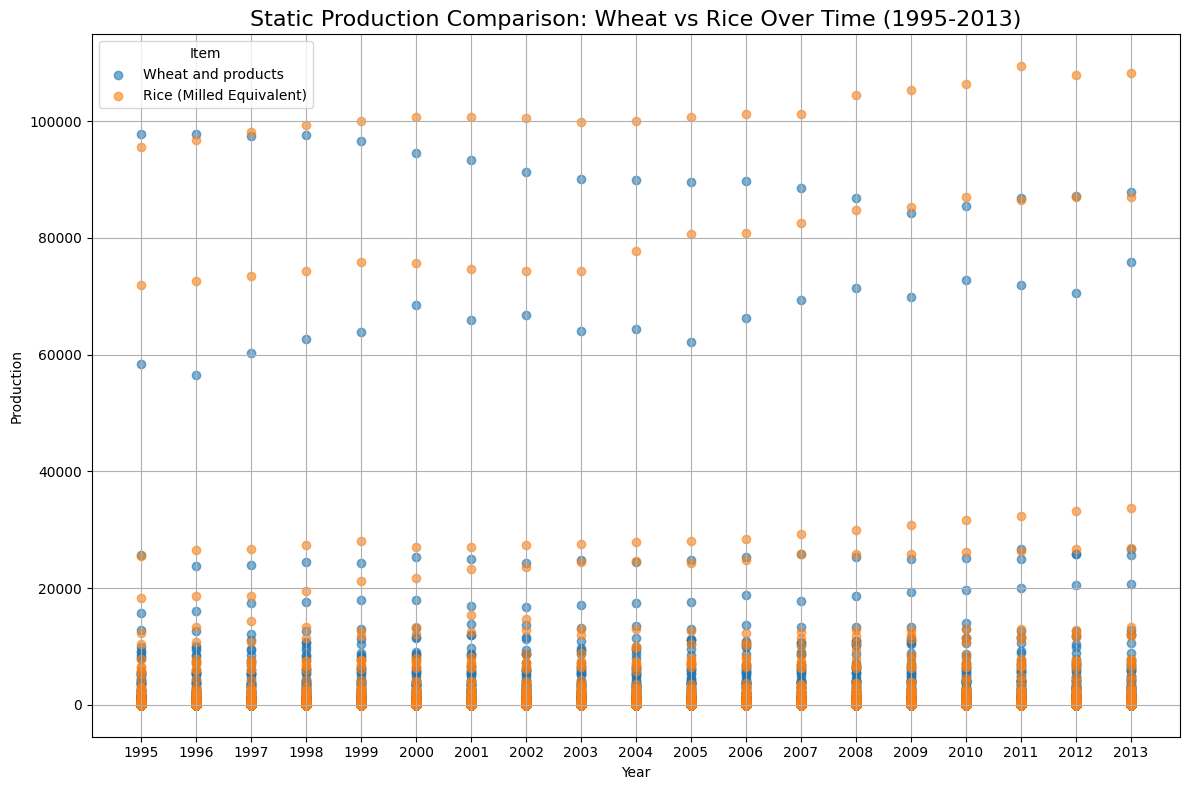

In [65]:
df_melted = df.melt(id_vars=['Area', 'Item'],
                                    value_vars=[str(year) for year in range(1995, 2014)],
                                    var_name='Year', value_name='Production')

df_melted['Year'] = pd.to_numeric(df_melted['Year'])

filtered_df_cleaned = df_melted[df_melted['Item'].isin(['Wheat and products', 'Rice (Milled Equivalent)'])]

plt.figure(figsize=(12, 8))
for item in ['Wheat and products', 'Rice (Milled Equivalent)']:
    subset = filtered_df_cleaned[filtered_df_cleaned['Item'] == item]
    plt.scatter(subset['Year'], subset['Production'], label=item, alpha=0.6)

plt.title('Static Production Comparison: Wheat vs Rice Over Time (1995-2013)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(ticks=range(1995, 2014))
plt.legend(title='Item')
plt.grid(True)
plt.tight_layout()
plt.show()


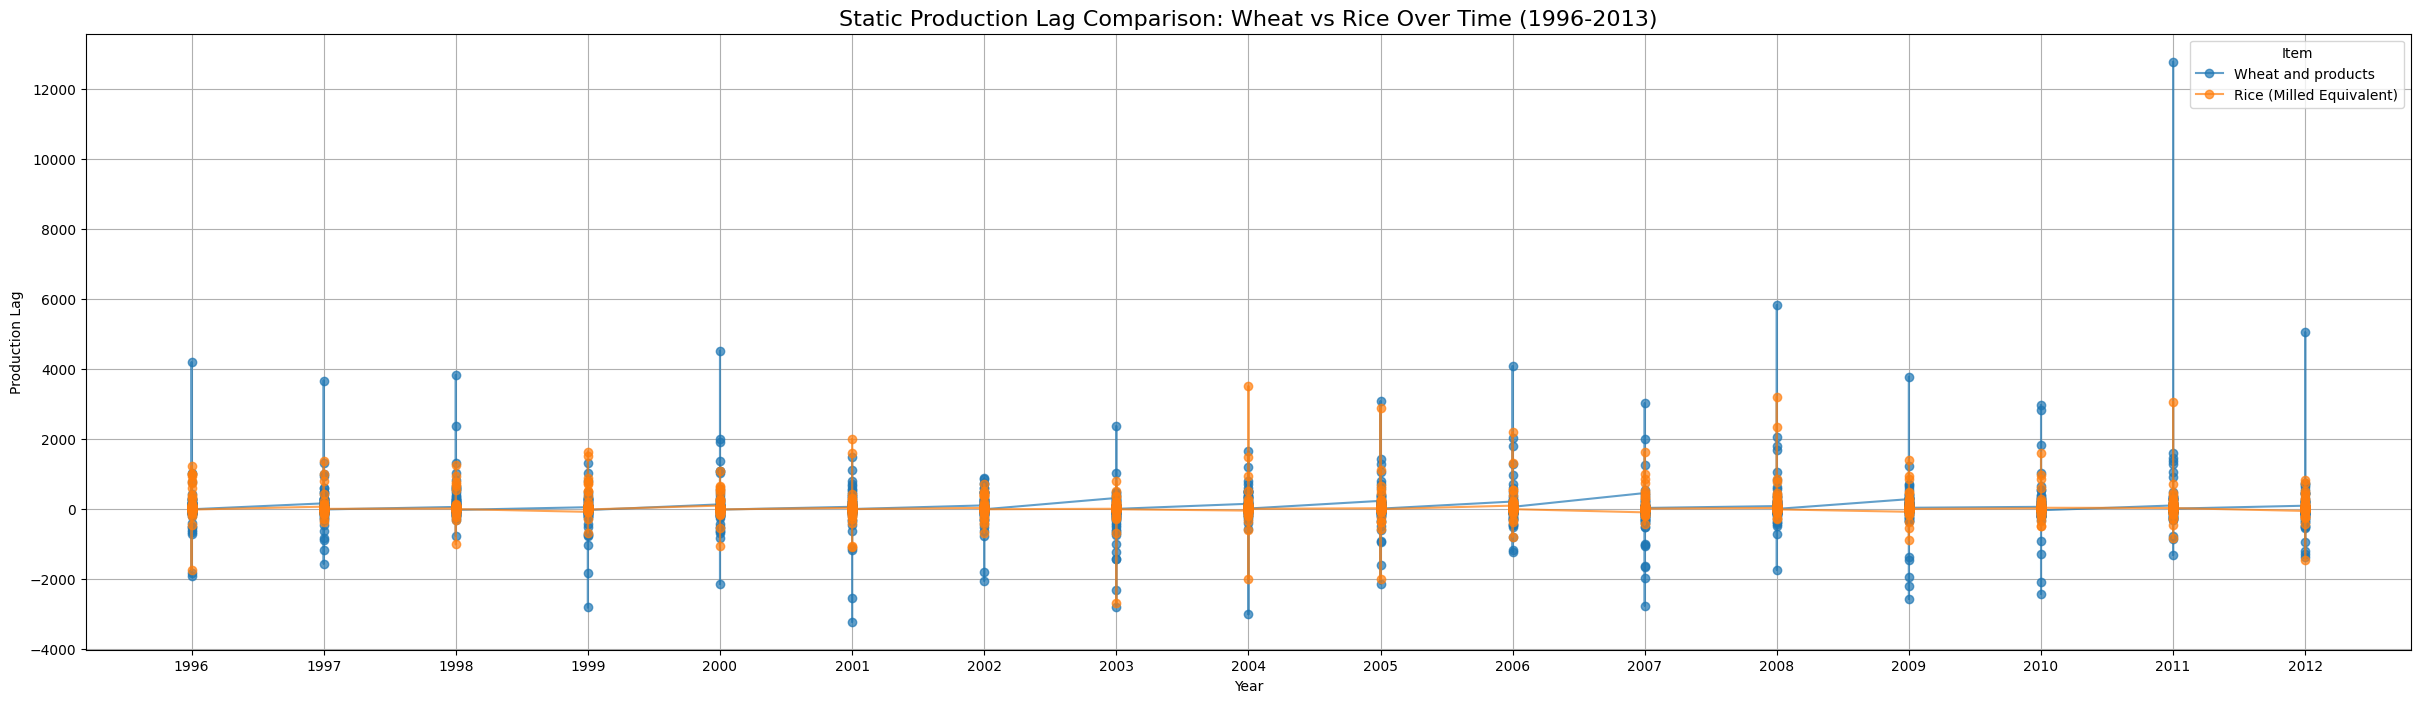

In [66]:
df_cleaned_melted_lag = df.melt(id_vars=['Area', 'Item'],
                                        value_vars=[f'production_lag_{year}' for year in range(1996, 2013)],
                                        var_name='Year', value_name='Production Lag')

df_cleaned_melted_lag['Year'] = df_cleaned_melted_lag['Year'].str.extract('(\d+)').astype(int)

filtered_df_cleaned_lag = df_cleaned_melted_lag[df_cleaned_melted_lag['Item'].isin(['Wheat and products', 'Rice (Milled Equivalent)'])]

plt.figure(figsize=(30, 8))
for item in ['Wheat and products', 'Rice (Milled Equivalent)']:
    subset = filtered_df_cleaned_lag[filtered_df_cleaned_lag['Item'] == item]
    plt.plot(subset['Year'], subset['Production Lag'], marker='o', label=item, alpha=0.7)

plt.title('Static Production Lag Comparison: Wheat vs Rice Over Time (1996-2013)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Production Lag')
plt.xticks(ticks=range(1996, 2013))
plt.legend(title='Item')
plt.grid(True)
plt.show()


In [67]:
df_melted = df.melt(id_vars=['Area', 'Item'],
                    value_vars=[str(year) for year in range(1995, 2014)],
                    var_name='Year', value_name='Production')

filtered_df = df_melted[df_melted['Item'].isin(['Wheat and products', 'Rice (Milled Equivalent)'])]

fig = px.scatter(filtered_df, x='Year', y='Production', color='Item',
                 size='Production', hover_name='Area',
                 title='Production Comparison: Wheat vs Rice Over Time')

fig.show()


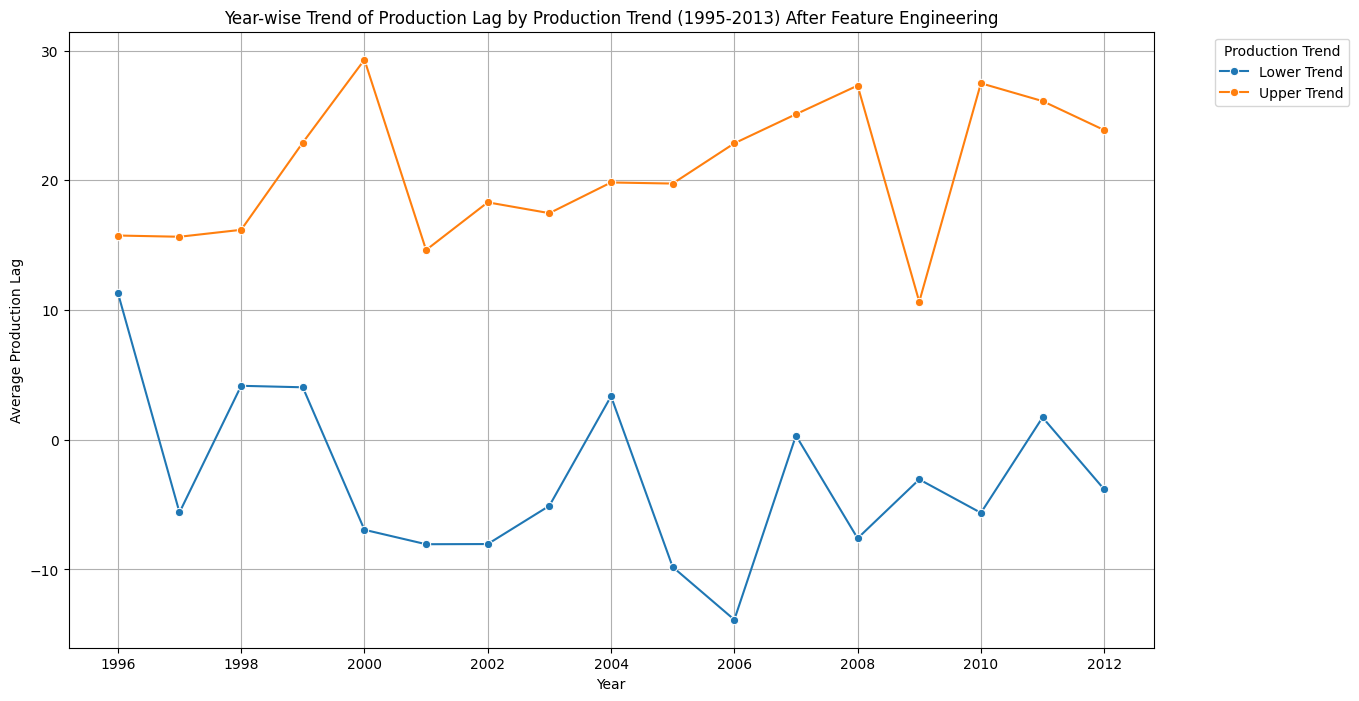

In [76]:
df_cleaned_melted = df.melt(id_vars=['Area', 'production_trend_1995_2013'],
                                    value_vars=[f'production_lag_{year}' for year in range(1996, 2013)],
                                    var_name='Year', value_name='Production Lag')

df_cleaned_melted['Year'] = df_cleaned_melted['Year'].str.extract('(\d+)').astype(int)

df_grouped_cleaned = df_cleaned_melted.groupby(['Year', 'production_trend_1995_2013'])['Production Lag'].mean().reset_index()

plt.figure(figsize=(14, 8))

sns.lineplot(data=df_grouped_cleaned, x='Year', y='Production Lag', hue='production_trend_1995_2013', marker='o')

plt.title('Year-wise Trend of Production Lag by Production Trend (1995-2013) After Feature Engineering')
plt.xlabel('Year')
plt.ylabel('Average Production Lag')
plt.legend(title='Production Trend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


Identify numerical and categorical features

In [22]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['category', 'object']).columns.tolist()

print("Numerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)


Numerical Features:
['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', 'production_lag_1996', 'production_lag_1997', 'production_lag_1998', 'production_lag_1999', 'production_lag_2000', 'production_lag_2001', 'production_lag_2002', 'production_lag_2003', 'production_lag_2004', 'production_lag_2005', 'production_lag_2006', 'production_lag_2007', 'production_lag_2008', 'production_lag_2009', 'production_lag_2010', 'production_lag_2011', 'production_lag_2012']

Categorical Features:
['Area', 'Item', 'Element', 'Unit (tonnes)', 'production_trend_1995_2013']


DATA PRE-PROCESSING and DATA SPLITTING

In [30]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=18))
])

X = df.drop(columns=['production_trend_1995_2013'])
y = df['production_trend_1995_2013']

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.125, random_state=42, stratify=y_train_temp)


X_train_pca = pca_pipeline.fit_transform(X_train)
X_val_pca = pca_pipeline.transform(X_val)
X_test_pca = pca_pipeline.transform(X_test)

pca = pca_pipeline.named_steps['pca']
explained_variance = pca.explained_variance_ratio_

print("Explained variance ratio of each principal component:", explained_variance)
print("Cumulative explained variance:", explained_variance.cumsum())

print(f'Shape of PCA transformed training data: {X_train_pca.shape}')
print(f'Shape of PCA transformed validation data: {X_val_pca.shape}')
print(f'Shape of PCA transformed test data: {X_test_pca.shape}')


Explained variance ratio of each principal component: [0.63279866 0.08908142 0.03518897 0.03000317 0.02345024 0.02168349
 0.01976451 0.01537718 0.01188102 0.01085382 0.00890968 0.00874864
 0.00762818 0.00752738 0.00723717 0.0058473  0.00515162 0.00400618]
Cumulative explained variance: [0.63279866 0.72188008 0.75706904 0.78707221 0.81052245 0.83220594
 0.85197045 0.86734763 0.87922865 0.89008247 0.89899214 0.90774078
 0.91536896 0.92289634 0.93013351 0.93598081 0.94113243 0.94513861]
Shape of PCA transformed training data: (12556, 18)
Shape of PCA transformed validation data: (1794, 18)
Shape of PCA transformed test data: (3588, 18)


# Model Evaluation

Define hyperparameter grids for each model

In [32]:
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__solver': ['liblinear', 'lbfgs'],
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance'],
    }
}


Define models

In [33]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

Printing Values

In [35]:
model_metrics = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    model_metrics[model_name] = {
        'Validation': {
            'Accuracy': val_accuracy,
            'Precision': val_precision,
            'Recall': val_recall,
            'F1 Score': val_f1
        },
        'Test': {
            'Accuracy': test_accuracy,
            'Precision': test_precision,
            'Recall': test_recall,
            'F1 Score': test_f1
        }
    }

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Validation Metrics: Accuracy: {val_accuracy:.2f}, Precision: {val_precision:.2f}, Recall: {val_recall:.2f}, F1 Score: {val_f1:.2f}")
    print(f"Test Metrics: Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1 Score: {test_f1:.2f}\n")

for model_name, metrics in model_metrics.items():
    print(f"{model_name}:")
    print(f"  Validation Metrics: {metrics['Validation']}")
    print(f"  Test Metrics: {metrics['Test']}\n")


Tuning Logistic Regression...
Best parameters for Logistic Regression: {'classifier__C': 10.0, 'classifier__solver': 'lbfgs'}
Validation Metrics: Accuracy: 0.83, Precision: 0.83, Recall: 0.83, F1 Score: 0.83
Test Metrics: Accuracy: 0.80, Precision: 0.80, Recall: 0.80, F1 Score: 0.80

Tuning Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Validation Metrics: Accuracy: 0.94, Precision: 0.94, Recall: 0.94, F1 Score: 0.94
Test Metrics: Accuracy: 0.94, Precision: 0.94, Recall: 0.94, F1 Score: 0.94

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Validation Metrics: Accuracy: 0.96, Precision: 0.96, Recall: 0.96, F1 Score: 0.96
Test Metrics: Accuracy: 0.96, Precision: 0.96, Recall: 0.96, F1 Score: 0.96

Tuning Decision Tree...
Best parameters for Decision Tree: {'classifier__m

# Ensemble top 3 models

In [44]:
sorted_models = sorted(model_metrics.items(), key=lambda x: x[1]['Validation']['Accuracy'], reverse=True)
top_3_models = sorted_models[:3]

print("Top 3 Models based on Validation Accuracy:")
for i, (model_name, metrics) in enumerate(top_3_models, 1):
    print(f"{i}. {model_name}: Validation Accuracy = {metrics['Validation']['Accuracy']:.2f}")

top_models = [
    (top_3_models[0][0], models[top_3_models[0][0]]),
    (top_3_models[1][0], models[top_3_models[1][0]]),
    (top_3_models[2][0], models[top_3_models[2][0]])
]

combined_model = VotingClassifier(estimators=top_models, voting='soft')

combined_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', combined_model)])
combined_pipeline.fit(X_train, y_train)

y_val_pred_combined = combined_pipeline.predict(X_val)
y_test_pred_combined = combined_pipeline.predict(X_test)

val_accuracy_combined = accuracy_score(y_val, y_val_pred_combined)
val_precision_combined = precision_score(y_val, y_val_pred_combined, average='weighted')
val_recall_combined = recall_score(y_val, y_val_pred_combined, average='weighted')
val_f1_combined = f1_score(y_val, y_val_pred_combined, average='weighted')

test_accuracy_combined = accuracy_score(y_test, y_test_pred_combined)
test_precision_combined = precision_score(y_test, y_test_pred_combined, average='weighted')
test_recall_combined = recall_score(y_test, y_test_pred_combined, average='weighted')
test_f1_combined = f1_score(y_test, y_test_pred_combined, average='weighted')

print("\nCombined Model (RDG_10) Metrics:")
print(f"Validation Accuracy: {val_accuracy_combined:.2f}, Precision: {val_precision_combined:.2f}, Recall: {val_recall_combined:.2f}, F1 Score: {val_f1_combined:.2f}")
print(f"Test Accuracy: {test_accuracy_combined:.2f}, Precision: {test_precision_combined:.2f}, Recall: {test_recall_combined:.2f}, F1 Score: {test_f1_combined:.2f}")

print("\nClassification Report for Validation Data:")
print(classification_report(y_val, y_val_pred_combined))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred_combined))



Top 3 Models based on Validation Accuracy:
1. Gradient Boosting: Validation Accuracy = 0.96
2. Random Forest: Validation Accuracy = 0.94
3. Decision Tree: Validation Accuracy = 0.89

Combined Model (RDG_10) Metrics:
Validation Accuracy: 0.92, Precision: 0.92, Recall: 0.92, F1 Score: 0.92
Test Accuracy: 0.92, Precision: 0.92, Recall: 0.92, F1 Score: 0.92

Classification Report for Validation Data:
              precision    recall  f1-score   support

 Lower Trend       0.94      0.87      0.90       728
 Upper Trend       0.91      0.96      0.94      1066

    accuracy                           0.92      1794
   macro avg       0.93      0.91      0.92      1794
weighted avg       0.92      0.92      0.92      1794


Classification Report for Test Data:
              precision    recall  f1-score   support

 Lower Trend       0.93      0.86      0.89      1455
 Upper Trend       0.91      0.96      0.93      2133

    accuracy                           0.92      3588
   macro avg     

Confusion Matrix

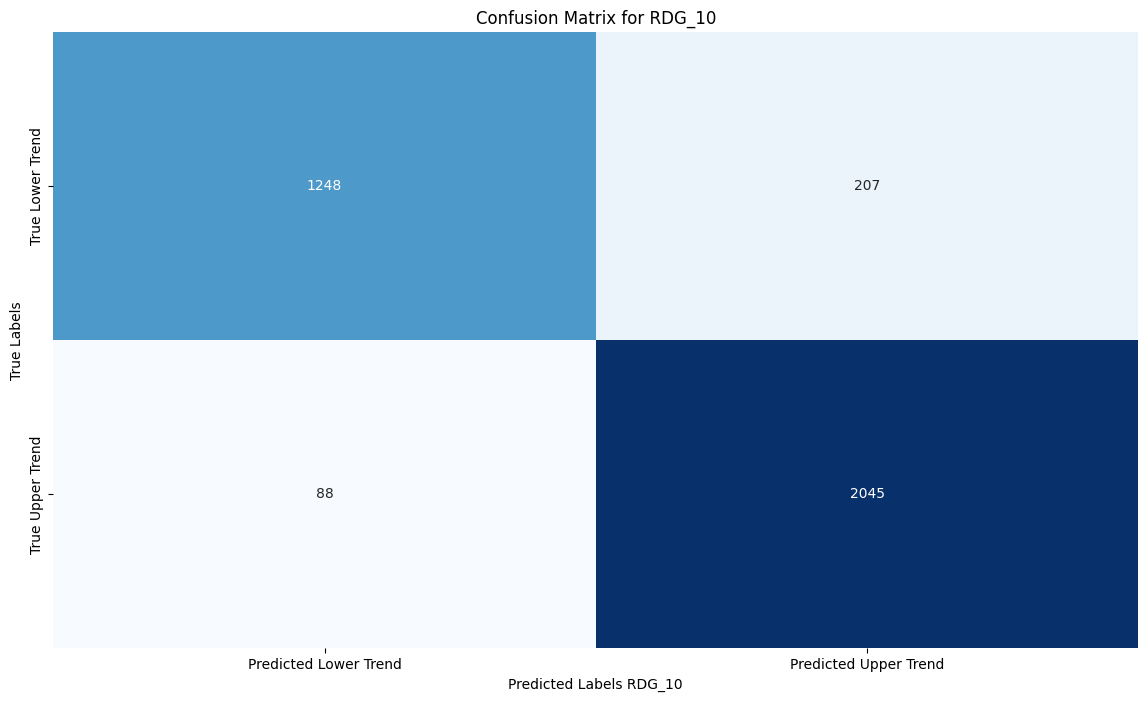


Confusion Matrix Components:
True Positives (TP): 2045
True Negatives (TN): 1248
False Positives (FP): 207
False Negatives (FN): 88


In [78]:
cm = confusion_matrix(y_test, y_test_pred_combined)

plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Lower Trend', 'Predicted Upper Trend'],
            yticklabels=['True Lower Trend', 'True Upper Trend'])

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

plt.xlabel('Predicted Labels RDG_10')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RDG_10')
plt.show()

print("\nConfusion Matrix Components:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")


AUC-ROC Curve

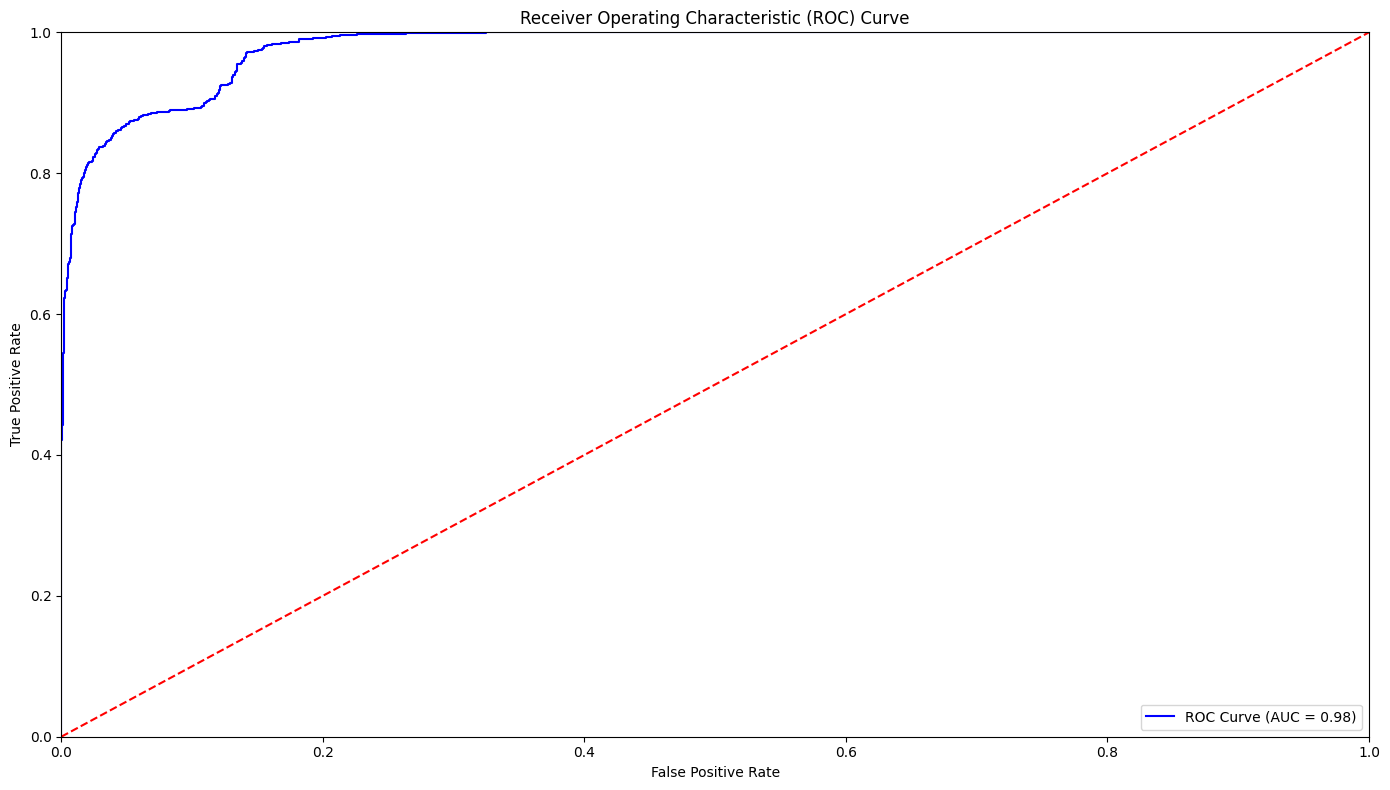

In [41]:
pos_label = 'Upper Trend'

y_test_prob = combined_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label=pos_label)
auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(14, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()